# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Изучение данных из файла

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Прочитали файл *real_estate_data.csv*, сохранили его в переменной *data* и получили информацию о данных. Так как значения в таблице были разделены *'\t'*, при чтении файла был использован параметр *sep*.

Всего в таблице 22 столбца с типами данных: *object*, *float*, *int* и *bool*.

Подробная информация о столбцах: 
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах(м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

В некоторых столбцах можно заметить пропущенные значения, которые нужно будет отработать.

In [ ]:
pd.set_option('display.max_columns', None) #для отображения всех столбцов

In [ ]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод

Из таблицы мы можем видеть пропущенные значения во многих столбцах, которые мы обработаем в следующем шаге. А также есть необходимость изменения типов данных в столбцах как *floors_total, balcony, last_price и столбцы о количестве и расстоянии до других объектов*. Стоит отметить, что обработаны будут только те столбцы, которые так или иначе могут повлиять на рыночную стоимость квартир и необходимы для исследования.

## Предобработка данных

В данном шаге определим и изучим пропущенные значения.

In [ ]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Рассмотрим столбцы, в которых имеются пропущенные значения:
* высота потолков 
* общее количество этажей в доме
* жилая площадь
* является ли квартира аппартаментами
* площадь кухни
* количество балконов
* название населенного пункта
* расстояние до центра города
* расстояние до ближайшего аэропорта
* число парков в радиусе 3 км
* расстояние до ближайшего парка
* число водоёмов в радиусе 3 км
* расстояние до ближайшего водоёма 
* сколько дней было размещено объявление

Проанализируем необходимые нам столбцы и произведем логичные замены.

In [ ]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

В наш анализ должны войти только жилые квартиры, и так как в столбце *is_apartment* очень много пустых значений помимо должных False и True, заменим пустые значения на False, чтобы не отбрасывать такое большое количество данных. С помощью *value_counts* также видим, что в столбце есть 50 апартаментов, отбросим эти строчки и оставим только жилые квартиры с помощью *query*. 

In [ ]:
data['is_apartment'] = data['is_apartment'].fillna(value="False")

In [ ]:
data = data.query('is_apartment == "False"')

In [ ]:
data['is_apartment'].value_counts()

False    20924
Name: is_apartment, dtype: int64

In [ ]:
data.dropna(subset=['floors_total'], inplace=True)
data.dropna(subset=['locality_name'], inplace=True)

Удалили строки, в которых отсутствует общее количество этажей в доме и название населенного пункта, пропущенных значений было незначительное количество, поэтому их удаление не повлияет на общий результат.

In [ ]:
data.isnull().sum() 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           8180
floors_total                0
living_area              1747
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2035
balcony                 11001
locality_name               0
airports_nearest         4898
cityCenters_nearest      4878
parks_around3000         4877
parks_nearest           13716
ponds_around3000         4877
ponds_nearest           12839
days_exposition          2896
dtype: int64

Провели проверку. В столбце *is_apartment* больше нет пропусков и все значения в датасете являются жилыми квартирами.
Далее можно заметить большое количество пропусков в столбце *balcony*. Заменим их на 0, так как, вероятней всего, их в квартирах нет.

In [ ]:
data['balcony'] = data['balcony'].fillna(0)

Теперь в столбце *balcony* тоже нет пустых значений. Перейдем к столбцам общего количества этажей, названия населенного пункта, числу парков и водоемов, расстояний до них и количеству дней на сайте. Оставим эти пропуски пустыми, потому что логической замены произвести невозможно, а терять данные строки - терять большую часть сета.   

В столбце высоты потолков заменим пустые значения на медиану:

In [ ]:
ceiling_height_avg = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(value=ceiling_height_avg)

Теперь перейдем к столбцам жилой площади и площади кухни. Заполним пропуски путем умножения общей площади на средний коэффициент по известным данным - жилая площадь/общая площадь или площадь кухни/общая площадь. Данная нормировка необходима, чтобы пустые значения были заполнены корректно.

In [ ]:
living_avg = data['living_area'].mean()
kitchen_avg = data['kitchen_area'].mean()
total_avg = data['total_area'].mean()
liv_coef = living_avg/total_avg
kit_coef = kitchen_avg/total_avg

In [ ]:
data['living_area'] = data['living_area'].fillna(value=data['total_area']*liv_coef)

In [ ]:
data['kitchen_area'] = data['kitchen_area'].fillna(value=data['total_area']*kit_coef)

In [ ]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         4898
cityCenters_nearest      4878
parks_around3000         4877
parks_nearest           13716
ponds_around3000         4877
ponds_nearest           12839
days_exposition          2896
dtype: int64

In [ ]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,False,False,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.600000,1,False,False,False,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.300000,4,False,False,False,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,90.770436,9,False,False,False,27.809136,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,False,False,False,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Отработали все пропуски. Теперь перейдем к изменению типов данных. Заменим в некоторых столбцах, где уместно, вещественный тип данных на целочисленный. Столбцы с пустыми значениями оставим как есть, так как пропуски нельзя заменить на целочисленный тип данных.

In [ ]:
data['balcony'] = data['balcony'].astype('int')
data['last_price'] = data['last_price'].astype('int')

В столбце с датой публикации заменим данные на тип *datetime*

In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20805 entries, 0 to 23698
Data columns (total 22 columns):
total_images            20805 non-null int64
last_price              20805 non-null int64
total_area              20805 non-null float64
first_day_exposition    20805 non-null datetime64[ns]
rooms                   20805 non-null int64
ceiling_height          20805 non-null float64
floors_total            20805 non-null float64
living_area             20805 non-null float64
floor                   20805 non-null int64
is_apartment            20805 non-null object
studio                  20805 non-null bool
open_plan               20805 non-null bool
kitchen_area            20805 non-null float64
balcony                 20805 non-null int64
locality_name           20805 non-null object
airports_nearest        15907 non-null float64
cityCenters_nearest     15927 non-null float64
parks_around3000        15928 non-null float64
parks_nearest           7089 non-null float64
ponds_arou

### Вывод

В данном шаге отработали пропуски и где возможно, были проведены логические замены. Пропуски в столбцах являются естественными, так как люди заполняют объявления по-разному и не всегда указывают все из возможных опций. Далее, в необходимых столбцах были заменены типы данных на целочисленный, и также был преобразован столбец с датой публикации.

## Расчёты и добавление результатов в таблицу

В данном шаге необходимо добавить в таблицу: 
* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры; варианты — первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [ ]:
data['price_sq'] = (data['last_price']/data['total_area']).astype('int')

Создали новый столбец с ценой квадратного метра путем деления стоимости квартиры на её площадь, сразу же заменили тип данных на целочисленный.

In [ ]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

Добавили три столбца с днем недели, месяцем и годом публикации.

In [ ]:
def floor_category(floors):
    if floors['floor'] == 1:
        return 'первый'
    if floors['floor'] == floors['floors_total']:
        return 'последний'
    else: return 'другой'
    
data['floor_category'] = data.apply(floor_category,1)

Создали функцию *floor_category*, которая сравнивает значения в столбцах *floor* и *floors_total* и делает вывод, является ли этаж первым, последним и другим. Затем применили эту функцию ко всем строкам и добавили новый столбец с выводом.

In [ ]:
data['living_to_total'] = data['living_area']/data['total_area']
data['kitchen_to_total'] = data['kitchen_area']/data['total_area']

In [ ]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq,weekday,month,year,floor_category,living_to_total,kitchen_to_total
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,90.770436,9,False,False,False,27.809136,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176,4,7,2015,другой,0.570883,0.174900
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018,другой,0.320000,0.410000


Добавили необходимые для исследования столбцы, переходим к анализу.

## Исследовательский анализ данных

Изучим следующие параметры: площадь, цена, число комнат, высота потолков и построим для них гистограммы.

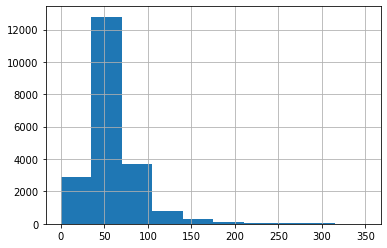

In [ ]:
data['total_area'].hist(range=(0,350))

Из гистограммы видно, что большинство выставленных квартир имеют площадь 40-60 квадратных метров, дальше 60-105 и 40 и меньше. Имеется длинный хвост высоких значений.

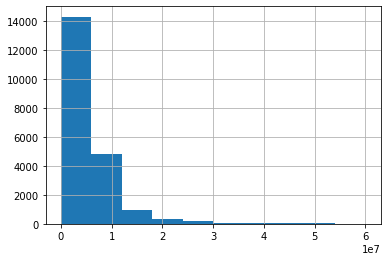

In [ ]:
data['last_price'].hist(range=(0,60000000))

Основная ценовая категория располагается в пределе 6 млн, около 4400 квартир - 6-12 млн, также имеется длинный хвост высоких цен.

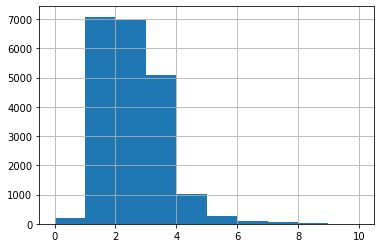

In [ ]:
data['rooms'].hist(range=(0,10))

Чуть больше 7 тысяч выставленных квартир - однокомнатные, двухкомнатных - около 7000, трехкомнатных - немного больше 5 тысяч, четырехкомнатных около 1000 и в остальных квартирах 5 комнат и больше.

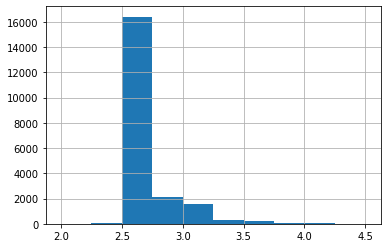

In [ ]:
data['ceiling_height'].hist(range=(2,4.5))

Высота потолков в большинстве квартир (16500) составляет 2.5 м, 2.75 м - в 2000 квартир, 3 м - 1800 квартирах.

Теперь рассмотрим время продажи квартиры и построим гистограмму.

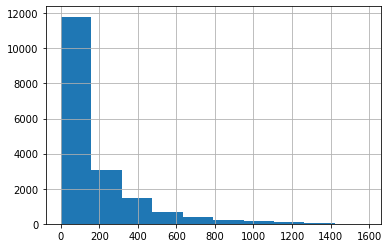

In [ ]:
data['days_exposition'].hist()

Можно увидеть, что, в основном, квартиры продаются в течение 150 дней - 5 месяцев. Найдем среднее значение и медиану.

In [ ]:
data['days_exposition'].mean()

175.41688536490034

In [ ]:
data['days_exposition'].median()

91.0

Видим, что среднее почти в два раза больше медианы, значит, в распределении длинный хвост больших значений, что мы можем также видеть из гистограммы. Значения 800-1400 дней можно считать необычно долгими, в то время как значения до 92 дней - быстрыми.


Удалим выбросы для некоторых параметров исходя из их гистограмм, а для некоторых построим ящики с усами для определения верхних границ.

На гистограмме общей площади видим длинный хвост значений свыше 210 кв. м., примем это число за верхнюю границу.

In [ ]:
data = data.query('total_area<210')

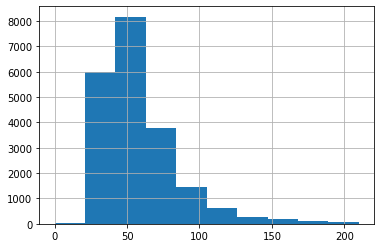

In [ ]:
data['total_area'].hist(range=(0,210))

Перейдем к цене, для нахождения границы построим ящик с усами. 

(0, 12000000)

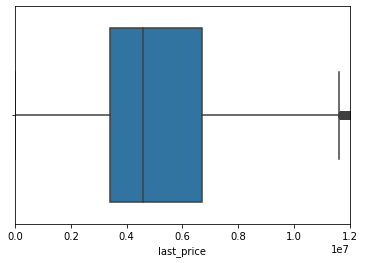

In [ ]:
sns.boxplot(data['last_price'])
plt.xlim(0, 12000000)

In [ ]:
data = data.query('last_price<11600000')

Верхняя граница цен составляет около 11.6 млн., отбросили значения, находящиеся выше.

Переходим к количеству комнат. Из гистограммы видим, что количество квартир, имеющих свыше 8 комнат - незначительное, примем 8 за верхнюю границу, а остальное уберем как выброс.

In [ ]:
data = data.query('rooms>0 and rooms<8')

Рассматривая высоту потолков, из гистограммы видим редкие значения с высотой ниже 2.5 м, что вероятней всего являлось опечаткой в объявлении и также довольно редкие значения свыше 3.5 м, отбросим то, что не входит в эти границы.

In [ ]:
data = data.query('ceiling_height>2.5 and ceiling_height<3.5')

(0, 600)

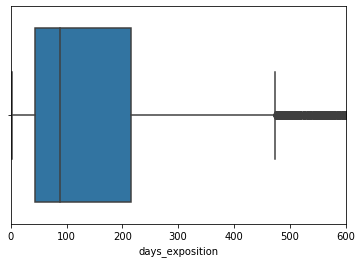

In [ ]:
sns.boxplot(data['days_exposition'])
plt.xlim(0, 600)

Из графика сверху видим, что верхняя граница количества дней нахождения объявления на сайте - 465, уберем выбросы.

In [ ]:
data = data.query('days_exposition<465')

Изучим зависимость цены от площади, числа комнат, удалённости от центра, также, на каком этаже расположена квартира: первом, последнем или другом и зависимость от даты размещения: дня недели, месяца и года.

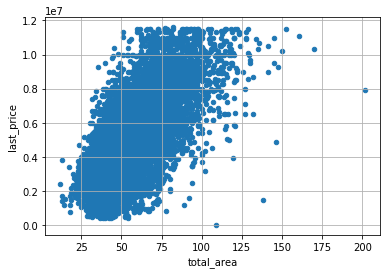

In [ ]:
data.plot(x='total_area', y='last_price',kind='scatter',grid=True)

Из данного графика зависимости цены от площади квартиры можно увидеть, что график уходит вправо, то есть увеличиваются цены с увеличением площади, при этом распределение равномерное и также присутствуют некоторые исключения, где цена высокая при небольшой площади или низкая при большой площади. На такие выбросы влияют другие возможные факторы, как расположение квартиры, этажность дома, ремонт и тд.

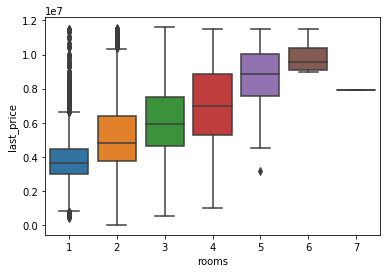

In [ ]:
sns.boxplot(x="rooms", y="last_price", data=data)

Из данного графика явно видим, что цены на квартиры зависят от количества комнат - чем больше комнат, тем порядок цен квартир увеличивается.

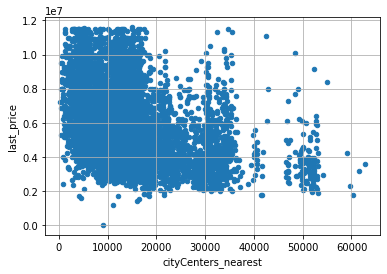

In [ ]:
data.plot(x='cityCenters_nearest', y='last_price',kind='scatter',grid=True)

На данном графике можно увидеть зависимость цены от удаленности от центра. Мы видим большое скопление квартир в диапазоне до 11.5 млн. рублей при расстоянии до 18 км от центра, после цены спадают. То есть даже если квартира находится в центре, она может стоить дешево. При этом верхние значения на графике находятся в левой части, то есть квартиры, которые находятся наиболее далеко от центра имеют низкую цену, в то время как самые дорогие квартиры находятся в центре. 

Зависимость есть, но данный фактор нельзя назвать основным.

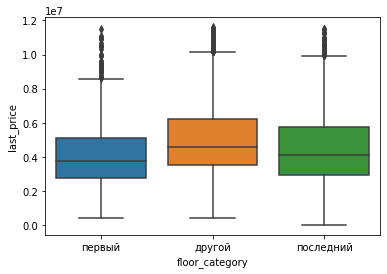

In [ ]:
sns.boxplot(x="floor_category", y="last_price", data=data)

Здесь можем видеть, что порядок цен квартир на других этажах выше, чем на первом и последнем.

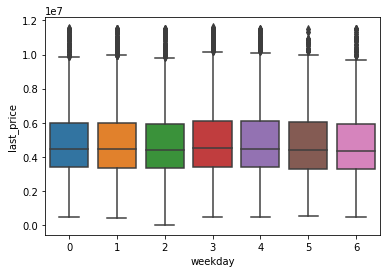

In [ ]:
sns.boxplot(x="weekday", y="last_price", data=data)

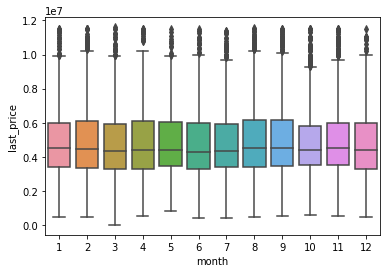

In [ ]:
sns.boxplot(x="month", y="last_price", data=data)

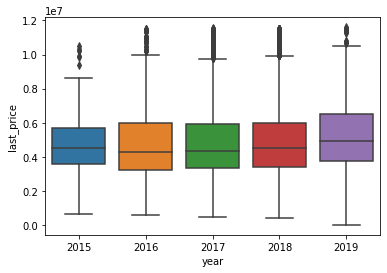

In [ ]:
sns.boxplot(x="year", y="last_price", data=data)

Видим, что в зависимости от даты объявления цены меняются незначительно, но в 2019 году можно наблюдать общий рост цен на квартиры.

Найдем 10 населённых пунктов с наибольшим числом объявлений. Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья.

In [ ]:
median_price_sq = data.pivot_table(index='locality_name', values='price_sq', aggfunc=['count','median'])
median_price_sq.columns = ['count','median']
median_price_sq.sort_values(by = 'count',ascending=False).head(10)

,count,median
locality_name,,
Санкт-Петербург,7995,101891.0
посёлок Мурино,398,85145.0
посёлок Шушары,303,76666.0
Всеволожск,248,66034.5
посёлок Парголово,235,91917.0
деревня Кудрово,208,91617.5
Колпино,172,74117.0
Пушкин,165,98601.0
Гатчина,155,67796.0


Из данного списка можем видеть, что самая высокая стоимость жилья в Санкт-Петербурге, а низкая в Выборге, цена за квадратный метр составляет 101891 и 56451 рублей соответственно.

Разберем квартиры в Санкт-Петербурге, нужно выяснить, какая область входит в центр. Для этого по графику зависимости цены от расстояния до центра определим границу центральной зоны.

In [ ]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0)
data['center_km'] = data['cityCenters_nearest']/1000
data['center_km'] = data['center_km'].astype('int')

In [ ]:
center_price = data.query('locality_name == "Санкт-Петербург"').pivot_table(index='center_km', values='last_price', aggfunc='median')
center_price.columns = ['median_price']
center_price.sort_values(by = 'center_km',ascending=True).head(10)

,median_price
center_km,
0,7424500.0
1,7940000.0
2,7500000.0
3,6970000.0
4,7315000.0
5,7200000.0
6,6500000.0
7,6490000.0
8,5969322.0


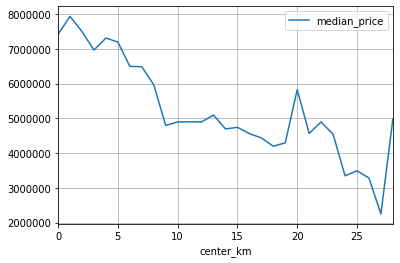

In [ ]:
center_price.plot(grid=True)

Из графика зависимости удаленности квартир от центра и средней цены можем видеть, что график меняется на 8.5 км, поэтому возьмем радиус 8.5 км за центральную зону.

Выделим сегмент квартир в центре Санкт-Петербурга. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также рассмотрим факторы, влияющие на стоимость квартиры: число комнат, этаж, удалённость от центра, дата размещения объявления.

In [ ]:
center_data = data.query('locality_name == "Санкт-Петербург" and center_km < 8.5')

count    1712.000000
mean       63.034527
std        21.736883
min        12.000000
25%        46.000000
50%        60.000000
75%        76.850000
max       152.200000
Name: total_area, dtype: float64


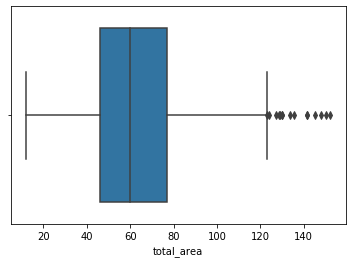

In [ ]:
print(center_data['total_area'].describe())
sns.boxplot(center_data['total_area'])

Из диаграммы размаха и описания данных видим, что в центре города основная часть квартир имеет площадь в диапазоне 46-77 кв.м. Далее рассмотрим цены.

count    1.712000e+03
mean     7.014173e+06
std      2.142801e+06
min      1.600000e+06
25%      5.400000e+06
50%      6.885000e+06
75%      8.565000e+06
max      1.154500e+07
Name: last_price, dtype: float64


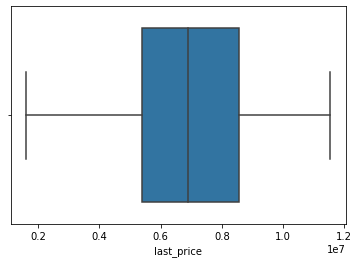

In [ ]:
print(center_data['last_price'].describe())
sns.boxplot(center_data['last_price'])

Из диаграммы размаха и описания данных видим, что в центре города цены в среднем находятся в диапазоне 1.6 - 8.6 млн рублей. Переходим к количеству комнат. 

count    1712.000000
mean        2.233645
std         0.955021
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: rooms, dtype: float64


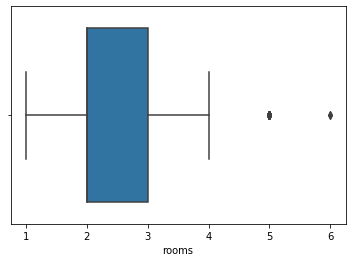

In [ ]:
print(center_data['rooms'].describe())
sns.boxplot(center_data['rooms'])

Из диаграммы размаха и описания данных видим, что в центре города большинтсво квартир 2-3-комнатные. 

count    1712.000000
mean        2.811139
std         0.223509
min         2.510000
25%         2.650000
50%         2.650000
75%         3.000000
max         3.490000
Name: ceiling_height, dtype: float64


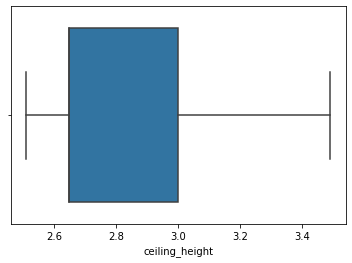

In [ ]:
print(center_data['ceiling_height'].describe())
sns.boxplot(center_data['ceiling_height'])

Высота потолков в квартирах в центре составляет 2.65 - 3 м. Также рассмотрим факторы, влияющие на стоимость квартиры: число комнат, этаж, удалённость от центра, дата размещения объявления.

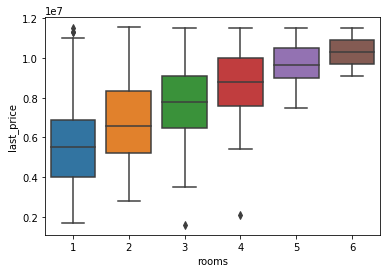

In [ ]:
sns.boxplot(x='rooms', y="last_price", data=center_data)

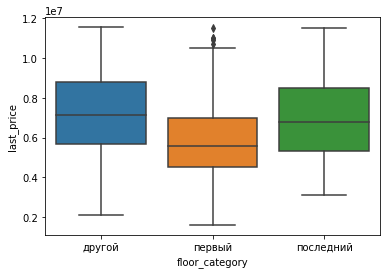

In [ ]:
sns.boxplot(x='floor_category', y="last_price", data=center_data)

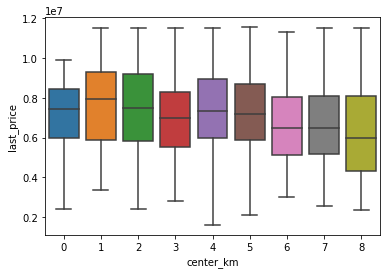

In [ ]:
sns.boxplot(x='center_km', y="last_price", data=center_data)

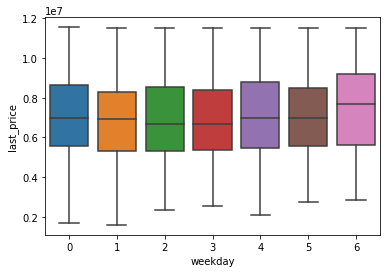

In [ ]:
sns.boxplot(x='weekday', y="last_price", data=center_data)

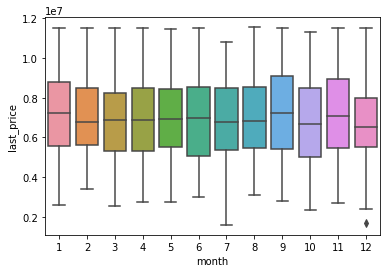

In [ ]:
sns.boxplot(x='month', y="last_price", data=center_data)

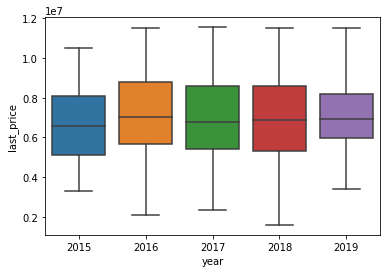

In [ ]:
sns.boxplot(x='year', y="last_price", data=center_data)

- Цены на квартиры в центре продаются в соответсвие с количеством комнат: чем больше комнат, тем дороже стоит квартира. Зависимость аналогична всем городам.
- Этажность также влияет как и в других городах, квартиры на первом этаже продаются дешевле всего, затем квартиры на последнем этаже и дороже всего - квартиры на других этажах.
- Удаленность от центра значительно влияет на цены, квартиры, расположенные в 1-2 км от центра наиболее дорогие.
- По дням видно, что в воскресенье квартиры продаются дороже чем в другие дни недели. Среди других городов такого не наблюдалось.
- В сентябре и ноябре 2015 - 2019 г. квартиры продавались дороже, в то время как в декабре были самые низкие цены. В то время как в других городах такой разницы не наблюдалось.
- Рассматривая год продаж видим, что в 2016 квартиры продавались по более высокой цене чем в остальные четыре года. Сравнивая с основным анализом наблюдается разница, так как в 2019 наблюдались пиковые цены в других городах.

## Общий вывод

В данном проекте были изучены и проанализованы объявления по продаже квартир на Яндекс.Недвижимости. Целью было определить параметры, которые влияют на рыночную стоимость квартиры. Данные были изучены, где необходимо, пропущенные значения найдены и заполнены. 

На основе данных были найдены дополнительные параметры, необходимые для дальнейшего анализа. Таким образом, параметры, влияющие на стоимость квартиры:

 - количество комнат: с увеличением количества комнат возрастает цена;
 - площадь квартиры: с увеличением площади увеличивается порядок цен;
 - этажность: квартиры на первом и последнем этажах дешевле;
 - расстояние до центра: чем дальше квартира расположена от центра, тем она дешевле.